MUHAMAD HIDAYATUL FADILLAH

22.11.5208

Perbandingan Kinerja Algoritma Random Forest dan Logistic Regression dalam Memprediksi Respons Pelanggan terhadap Kampanye Pemasaran"

In [ ]:
# Import pustaka
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/semester6/PDM/UTS/marketing_campaign.csv', sep="\t")
# Menampilkan jumlah data poin
print("Number of datapoints:", len(data))

# Menampilkan lima baris pertama dari dataset
data.head()

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Informasi tentang fitur-fitur dalam dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

<Axes: >

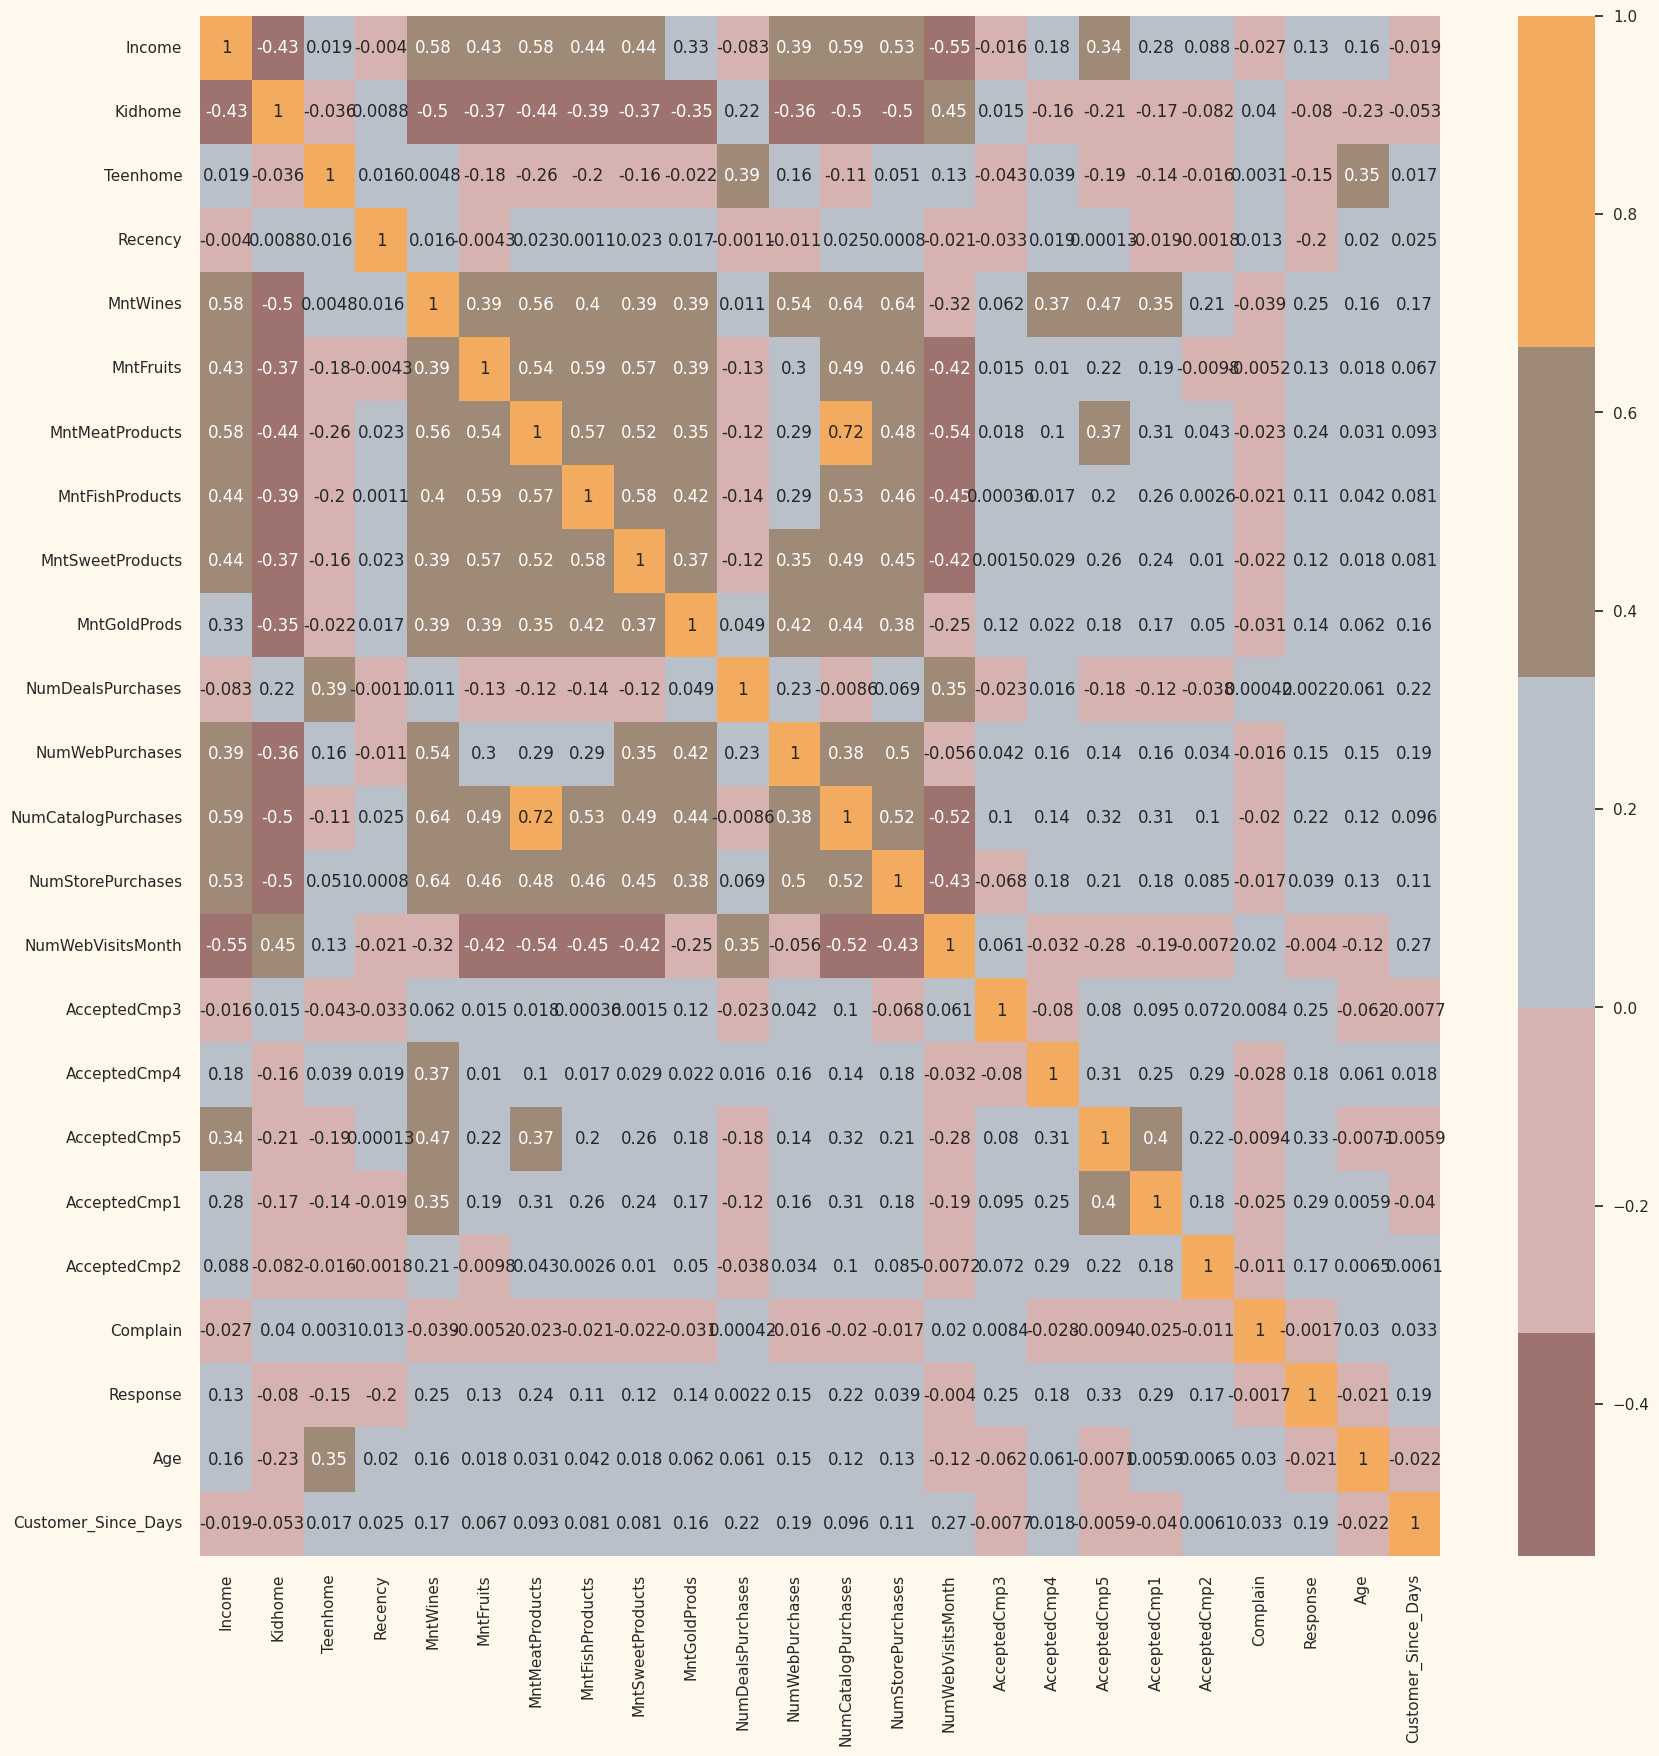

In [ ]:
#correlation matrix
corrmat = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [ ]:
# Pra-pemrosesan data
data = df.copy()
data['Age'] = 2025 - data['Year_Birth']
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)
data['Customer_Since_Days'] = (pd.to_datetime('2025-01-01') - data['Dt_Customer']).dt.days
drop_cols = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
data.drop(columns=drop_cols, inplace=True)

In [ ]:
# Pisahkan fitur dan target
X = data.drop('Response', axis=1)
y = data['Response']
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model pipelines
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [ ]:
# Latih dan evaluasi Random Forest
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]
print('Klasifikasi Random Forest:',
      classification_report(y_test, rf_preds))
print('Random Forest ROC AUC:', roc_auc_score(y_test, rf_proba))

Klasifikasi Random Forest:               precision    recall  f1-score   support

           0       0.88      0.98      0.93       379
           1       0.71      0.29      0.41        69

    accuracy                           0.87       448
   macro avg       0.80      0.63      0.67       448
weighted avg       0.86      0.87      0.85       448

Random Forest ROC AUC: 0.8650529616458261


In [ ]:
# Latih dan evaluasi Logistic Regression
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:, 1]
print('Klasifikasi Logistic Regression:', classification_report(y_test, lr_preds))
print('Logistic Regression ROC AUC:', roc_auc_score(y_test, lr_proba))

Klasifikasi Logistic Regression:               precision    recall  f1-score   support

           0       0.89      0.97      0.93       379
           1       0.64      0.33      0.44        69

    accuracy                           0.87       448
   macro avg       0.76      0.65      0.68       448
weighted avg       0.85      0.87      0.85       448

Logistic Regression ROC AUC: 0.8547283086688845
